In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
# load dataset
df = pd.read_csv("train.csv")

# display first few rows of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Usando duas features iniciais
X = df[["GrLivArea", "YearBuilt"]]
y = df["SalePrice"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonamento necessário para SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Support Vector Machine
svm = SVR(kernel="rbf")
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)


In [11]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "SVM", "Decision Tree", "Random Forest"],
    "MSE": [mse_lr, mse_svm, mse_dt, mse_rf]
})
results


,Model,MSE
0,Linear Regression,2.495555e+09
1,SVM,7.842026e+09
2,Decision Tree,2.184046e+09
3,Random Forest,1.546712e+09


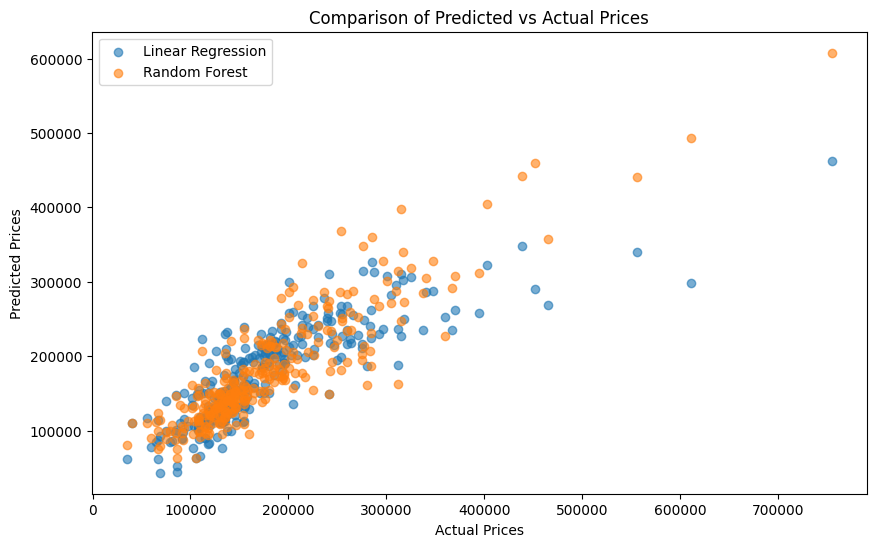

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Comparison of Predicted vs Actual Prices")
plt.legend()
plt.show()


In [ ]:
# Conclusion

# Random Forest achieved the best performance (lowest MSE), showing robustness and capturing complex relationships in the data.

# Decision Tree performed better than Linear Regression, but it may suffer from overfitting on unseen data.

# Linear Regression provided reasonable results, is simple, and easy to interpret, but it cannot capture all nonlinear relationships.

# SVM performed the worst without hyperparameter tuning, likely requiring a different kernel or parameter adjustment.

# Practical insights:

# For this dataset, Random Forest is the most suitable model.

# Decision Tree can be used, but with caution regarding overfitting.

# Linear Regression is good for an initial analysis and baseline comparison.

# SVM needs careful tuning to perform well.
